# Fuji

In [192]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Load Data
dataset = pd.read_csv("../Apple462.csv")
dataset

# Split data from region and drop the unused data
netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Gala'], axis=1, inplace=True)


netherlands_dataset # Show dataframe

C:\Users\maiwi\AppData\Local\Temp\ipykernel_17636\4266501386.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Gala'], axis=1, inplace=True)


,Date,Fuji,region
884,27/12/2015,288004.0,Netherland
885,20/12/2015,278067.0,Netherland
886,13/12/2015,386865.0,Netherland
887,6/12/2015,490805.0,Netherland
888,29/11/2015,289534.0,Netherland
...,...,...,...
3508,4/2/2018,300383.0,Netherland
3509,28/1/2018,103716.0,Netherland
3510,21/1/2018,153445.0,Netherland
3511,14/1/2018,292562.0,Netherland


In [193]:
netherlands_dataset.count() # see df count to check misvalue

Date      169
Fuji      164
region    169
dtype: int64

# Filter samples have over range 

In [194]:
netherlands_dataset = netherlands_dataset[netherlands_dataset['Fuji'] <= 580000] # best 580000
netherlands_dataset

,Date,Fuji,region
884,27/12/2015,288004.0,Netherland
885,20/12/2015,278067.0,Netherland
886,13/12/2015,386865.0,Netherland
887,6/12/2015,490805.0,Netherland
888,29/11/2015,289534.0,Netherland
...,...,...,...
3508,4/2/2018,300383.0,Netherland
3509,28/1/2018,103716.0,Netherland
3510,21/1/2018,153445.0,Netherland
3511,14/1/2018,292562.0,Netherland


## Fill the average value to misvalue in dataframe

In [195]:
# average Fuji
avg_Fuji = math.ceil(netherlands_dataset['Fuji'].sum() / len(netherlands_dataset['Fuji']))

print(f"Average Fuji: {avg_Fuji}")

# add avg in miss value
netherlands_dataset['Fuji'].fillna(avg_Fuji, inplace=True)

netherlands_dataset.count()

Average Fuji: 280347


C:\Users\maiwi\AppData\Local\Temp\ipykernel_17636\4044880444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Fuji'].fillna(avg_Fuji, inplace=True)


Date      163
Fuji      163
region    163
dtype: int64

In [196]:
netherlands_dataset

,Date,Fuji,region
884,27/12/2015,288004.0,Netherland
885,20/12/2015,278067.0,Netherland
886,13/12/2015,386865.0,Netherland
887,6/12/2015,490805.0,Netherland
888,29/11/2015,289534.0,Netherland
...,...,...,...
3508,4/2/2018,300383.0,Netherland
3509,28/1/2018,103716.0,Netherland
3510,21/1/2018,153445.0,Netherland
3511,14/1/2018,292562.0,Netherland


## Graph Before Training

Show the graph after sorted by 'Date'

In [197]:
netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
netherlands_dataset = netherlands_dataset.sort_values(by='Date') # sort by date

# netherlands_dataset


C:\Users\maiwi\AppData\Local\Temp\ipykernel_17636\578826047.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
C:\Users\maiwi\AppData\Local\Temp\ipykernel_17636\578826047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function


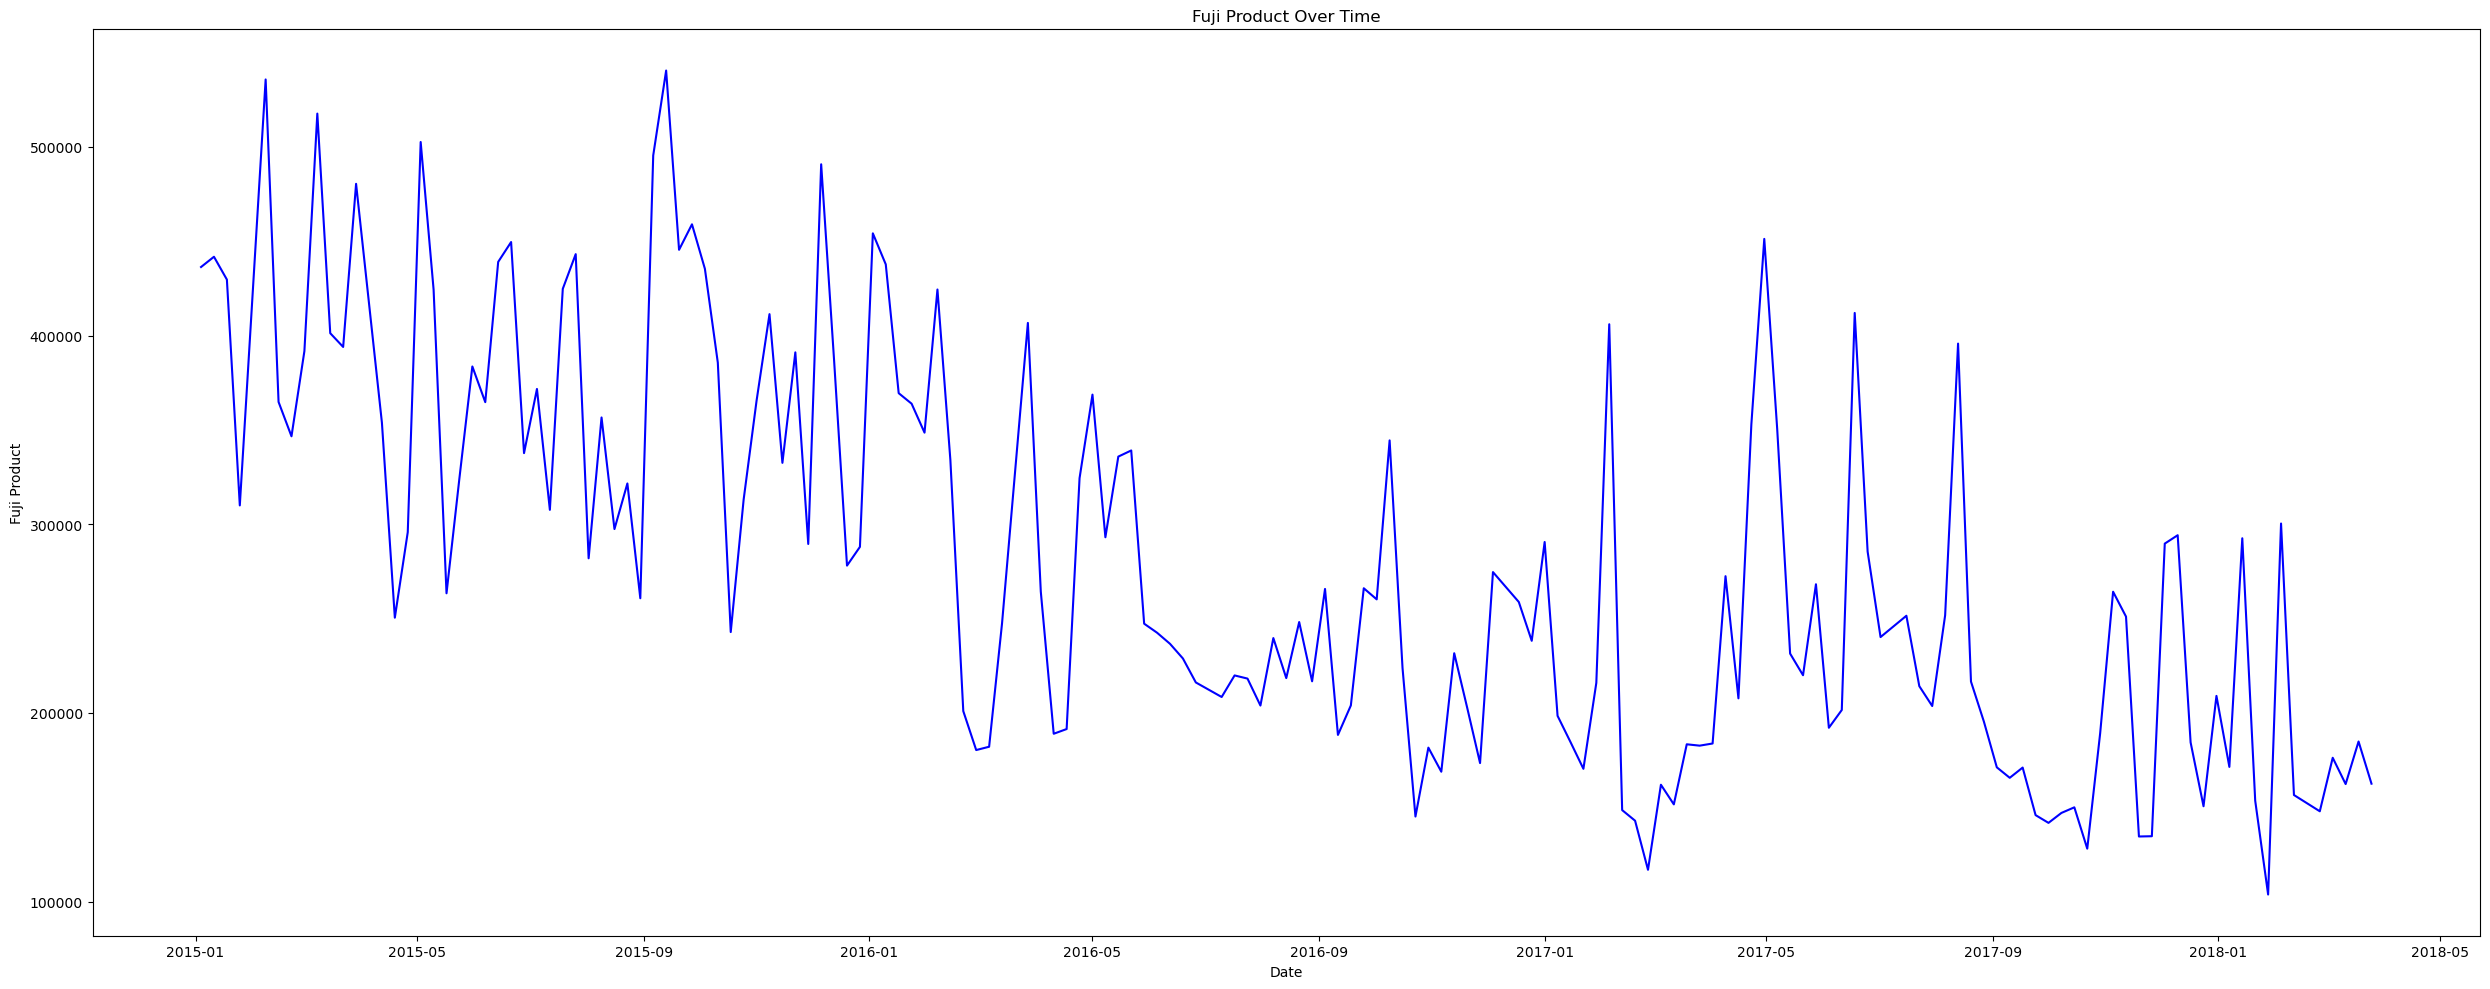

In [198]:
# graph size
plt.figure(figsize=(25, 10))
plt.plot(netherlands_dataset['Date'], netherlands_dataset['Fuji'], color='b')

plt.xlabel('Date')

plt.ylabel('Fuji Product')
# plt.yscale('log') # set log scale

plt.title('Fuji Product Over Time')
# plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()

plt.show()

## Scale 

Use StandardScaler from sklearn to scale down the 'Fuji' feature

In [199]:
# # scale
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(netherlands_dataset[['Fuji']])
# netherlands_dataset['Fuji'] = scaled_data

# netherlands_dataset

## Create new feature 

We make the function date_split to split 1 feature to get the 3 feature  
* year
* month
* day

and get_season function to make the season

In [200]:
# function สำหรับสร้าง feature เพิ่ม (year, month, day)

def date_split(data):
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month   
    data['day'] = data['Date'].dt.day

date_split(netherlands_dataset)


def get_season(day, month):
    if (month == 3 and day >= 21) or month in range(4, 6) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or month in range(7, 9) or (month == 9 and day < 21):
        return 'Summer'
    elif (month == 9 and day >= 21) or month in range(10, 12) or (month == 12 and day < 21):
        return 'Autumn'
    else:
        return 'Winter'

netherlands_dataset['season'] = netherlands_dataset.apply(lambda x: get_season(x['day'], x['month']), axis=1)

season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
netherlands_dataset['season'] = netherlands_dataset['season'].map(season_mapping)



df = netherlands_dataset.set_index('Date') # set 'Date' to id because it unique

### This is the df after prepare and it ready to train the model

In [201]:
df

,Fuji,region,year,month,day,season
Date,,,,,,
2015-01-04,436348.0,Netherland,2015,1,4,3
2015-01-11,441786.0,Netherland,2015,1,11,3
2015-01-18,429687.0,Netherland,2015,1,18,3
2015-01-25,309975.0,Netherland,2015,1,25,3
2015-02-08,535769.0,Netherland,2015,2,8,3
...,...,...,...,...,...,...
2018-02-25,147837.0,Netherland,2018,2,25,3
2018-03-04,176207.0,Netherland,2018,3,4,3
2018-03-11,162270.0,Netherland,2018,3,11,3


## For case user time step 

The Fuji_x1 gets the next label of the next sample, you can uncomment below if you want to test 

In [202]:
df['Fuji_x1'] = df['Fuji'].shift(-1, fill_value=0)
df['Fuji_x2'] = df['Fuji'].shift(-2, fill_value=0)
df['Fuji_x3'] = df['Fuji'].shift(-3, fill_value=0)
df['Fuji_x4'] = df['Fuji'].shift(-4, fill_value=0)
df['Fuji_x5'] = df['Fuji'].shift(-5, fill_value=0)

# df['Fuji_x6'] = df['Fuji'].shift(-6, fill_value=0)
# df['Fuji_x7'] = df['Fuji'].shift(-7, fill_value=0)
# df['Fuji_x8'] = df['Fuji'].shift(-8, fill_value=0)

df['Fuji_avg_next_5_days'] = (df['Fuji'].shift(-1) + df['Fuji'].shift(-2) + df['Fuji'].shift(-3) + df['Fuji'].shift(-4) + df['Fuji'].shift(-5)) / 5

df.drop(df.tail(5).index, inplace=True)

df.drop(['Fuji_x1', 'Fuji_x2', 'Fuji_x3', 'Fuji_x4', 'Fuji_x5'], axis=True, inplace=True)

df

,Fuji,region,year,month,day,season,Fuji_avg_next_5_days
Date,,,,,,,
2015-01-04,436348.0,Netherland,2015,1,4,3,416407.0
2015-01-11,441786.0,Netherland,2015,1,11,3,397373.4
2015-01-18,429687.0,Netherland,2015,1,18,3,389792.2
2015-01-25,309975.0,Netherland,2015,1,25,3,431331.2
2015-02-08,535769.0,Netherland,2015,2,8,3,404429.4
...,...,...,...,...,...,...,...
2018-01-14,292562.0,Netherland,2018,1,14,3,172368.0
2018-01-21,153445.0,Netherland,2018,1,21,3,176920.4
2018-01-28,103716.0,Netherland,2018,1,28,3,188631.2


## Set seed_value 

In [203]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

## Train and Test Model

### import lib that we need to use

In [204]:
# Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression # best
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [205]:
# Show performance
def print_centered(text, width):
    padding = '-' * ((width - len(text)) // 2)
    print(padding + text.center(width - len(padding)) + padding)
    print()



def fit_model(alg, X_train, y_train, X_test, y_test):
    # Instantiate the model
    model = alg()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Compute and print evaluation metrics
    print_centered(alg.__name__, 60)

    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE) : {MAE}')
    print(f'Mean Absolute Percentage Error (MAPE) : {MAPE}')
    # print(f'Mean Squared Error (MSE) : {MSE}')
    # print(f'R2 Score (R2) : {R2}')

    print()
    print()
    
    return y_pred, MAE, MAPE
    

In [206]:
# Train model


df.drop(['region'], axis=1, inplace=True)

df['Date_ordinal'] = df.index.to_series().apply(lambda x: x.toordinal())

train, test = train_test_split(df, test_size=0.15)


X_train = train.drop(['Fuji'], axis=1)
y_train = train['Fuji']

X_test = test.drop(['Fuji'], axis=1)
y_test = test['Fuji']


test['Fuji_Predicted_DTR'], MAE_DTR, MAPE_DTR = fit_model(DecisionTreeRegressor, X_train, y_train, X_test, y_test)
test['Fuji_Predicted_LR'], MAE_LR, MAPE_LR = fit_model(LinearRegression, X_train, y_train, X_test, y_test) 
test['Fuji_Predicted_SVR'], MAE_SVR, MAPE_SVR = fit_model(SVR, X_train, y_train, X_test, y_test)
test['Fuji_Predicted_GBR'], MAE_GBR, MAPE_GBR = fit_model(GradientBoostingRegressor, X_train, y_train, X_test, y_test)
test['Fuji_Predicted_RFR'], MAE_RFR, MAPE_RFR = fit_model(RandomForestRegressor, X_train, y_train, X_test, y_test) # best



-------------------          DecisionTreeRegressor          -------------------

Mean Absolute Error (MAE) : 82803.5
Mean Absolute Percentage Error (MAPE) : 0.3292996271727874


----------------------           LinearRegression           ----------------------

Mean Absolute Error (MAE) : 53146.58733371397
Mean Absolute Percentage Error (MAPE) : 0.22955188544868013


----------------------------              SVR               ----------------------------

Mean Absolute Error (MAE) : 83023.19812754485
Mean Absolute Percentage Error (MAPE) : 0.3388771601848914


-----------------         GradientBoostingRegressor         -----------------

Mean Absolute Error (MAE) : 48147.81488947844
Mean Absolute Percentage Error (MAPE) : 0.2001431482633671


-------------------          RandomForestRegressor          -------------------

Mean Absolute Error (MAE) : 44429.38999999999
Mean Absolute Percentage Error (MAPE) : 0.18216588374083087




In [207]:
test.drop(['year', 'month', 'day', 'season', 'Date_ordinal', 'Fuji_avg_next_5_days'], axis=1, inplace=True)
test

,Fuji,Fuji_Predicted_DTR,Fuji_Predicted_LR,Fuji_Predicted_SVR,Fuji_Predicted_GBR,Fuji_Predicted_RFR
Date,,,,,,
2017-07-23,214166.0,285477.0,224473.850891,264248.141178,242124.582065,246379.95
2015-11-29,289534.0,288004.0,333887.776823,264251.479238,304515.298665,313419.04
2017-09-03,171139.0,406006.0,208850.066826,264245.659867,246160.287300,223416.86
2018-02-04,300383.0,141695.0,183757.856827,264245.928644,237040.171578,207856.64
2016-10-16,223737.0,344449.0,239140.172235,264246.428297,260990.441986,237783.98
2015-08-09,356593.0,517670.0,389197.324560,264251.569316,416606.837105,411836.97
2016-11-27,173402.0,216733.0,236948.608066,264248.128298,221597.233913,219863.17
2016-12-18,258779.0,208422.0,239449.161956,264247.197313,212041.803404,219841.10
2016-11-20,202860.0,266059.0,248256.173339,264247.996379,218499.985318,226695.92


## Graph after training

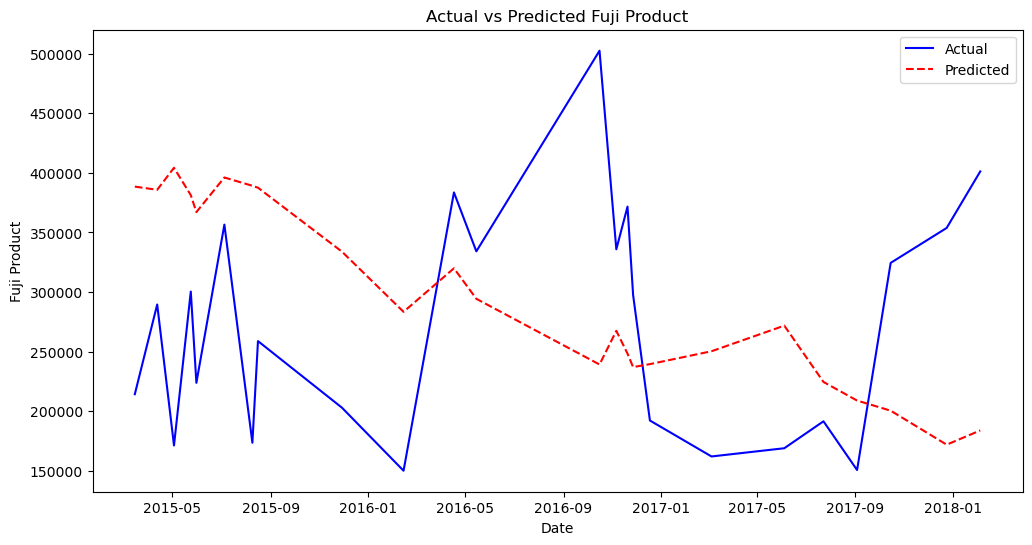

In [208]:
test = test.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, test['Fuji_Predicted_LR'], label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
# plt.yscale('log')
plt.ylabel('Fuji Product')
plt.title('Actual vs Predicted Fuji Product')
plt.legend()
plt.show()


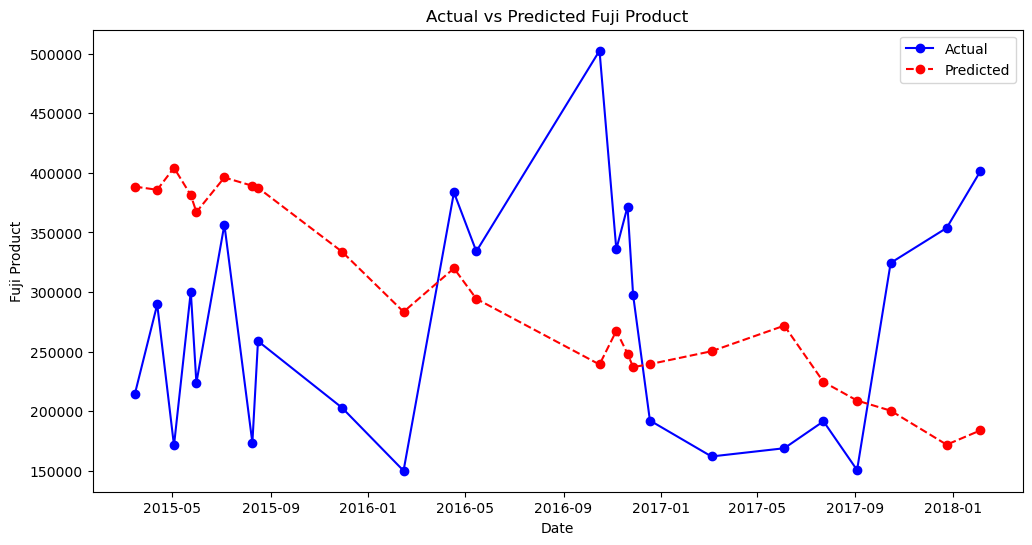

In [209]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(test.index, test['Fuji_Predicted_LR'], label='Predicted', color='red', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Fuji Product')
plt.title('Actual vs Predicted Fuji Product')
plt.legend()
plt.show()


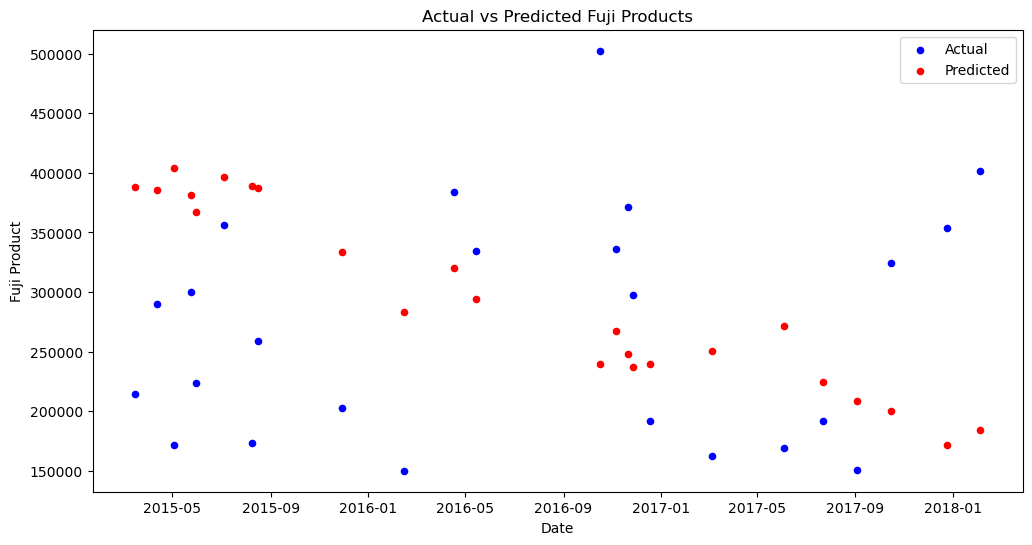

In [210]:
plt.figure(figsize=(12, 6))
plt.scatter(test.index, y_test, label='Actual', color='blue', s=20) 
plt.scatter(test.index, test['Fuji_Predicted_LR'], label='Predicted', color='red', s=20)  
plt.xlabel('Date')
plt.ylabel('Fuji Product')
# plt.yscale('log')
plt.title('Actual vs Predicted Fuji Products')
plt.legend()
plt.show()


## Compare performance between algorithms

In [211]:
# Create a DataFrame to compare the performance of algorithms
comparison_df = pd.DataFrame({
    'Algorithm': ['DecisionTreeRegressor', 'LinearRegression', 'SVR', 'GradientBoostingRegressor', 'RandomForestRegressor'],
    'MAPE': [MAPE_DTR, MAPE_LR, MAPE_SVR, MAPE_GBR, MAPE_RFR]
})

# Sort the DataFrame by MAPE values
comparison_df = comparison_df.sort_values(by='MAPE')

# Print the comparison DataFrame
print(comparison_df)


                   Algorithm      MAPE
4      RandomForestRegressor  0.182166
3  GradientBoostingRegressor  0.200143
1           LinearRegression  0.229552
0      DecisionTreeRegressor  0.329300
2                        SVR  0.338877


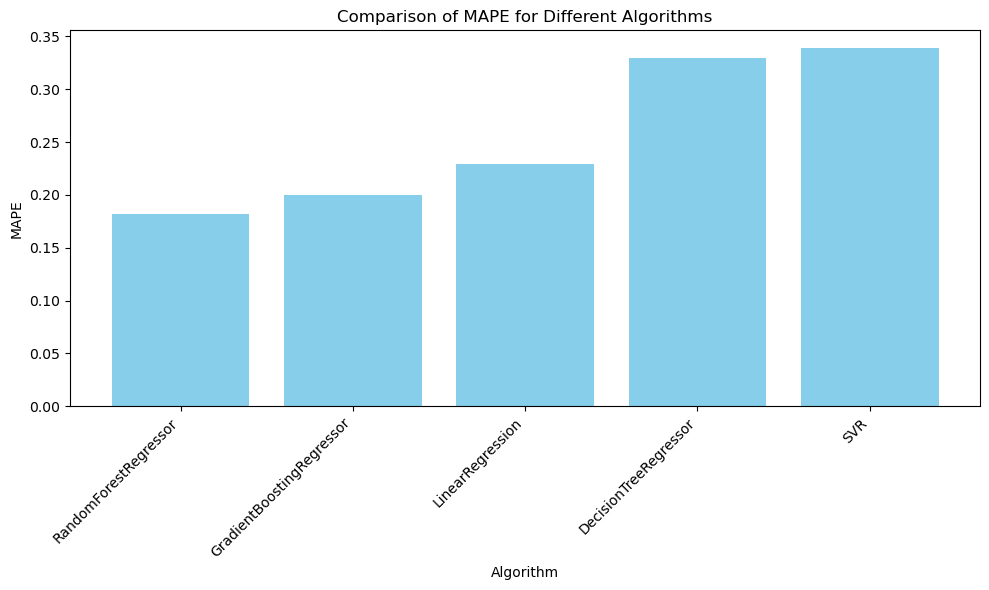

In [212]:
# Create a bar plot to compare the performance of algorithms based on MAPE
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Algorithm'], comparison_df['MAPE'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('MAPE')
plt.title('Comparison of MAPE for Different Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


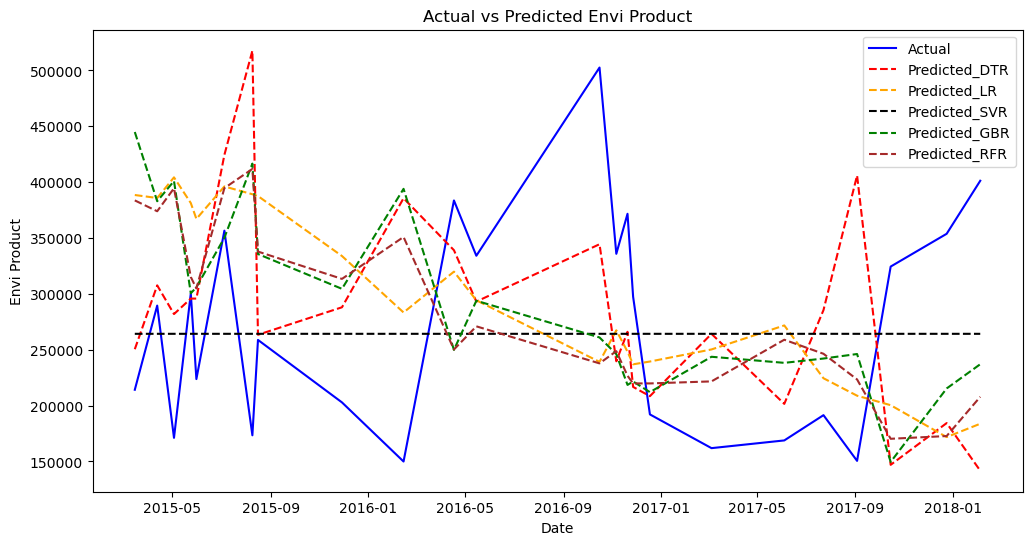

In [213]:
test = test.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, test['Fuji_Predicted_DTR'], label='Predicted_DTR', color='red', linestyle='--')

plt.plot(test.index, test['Fuji_Predicted_LR'], label='Predicted_LR', color='orange', linestyle='--')

plt.plot(test.index, test['Fuji_Predicted_SVR'], label='Predicted_SVR', color='black', linestyle='--')

plt.plot(test.index, test['Fuji_Predicted_GBR'], label='Predicted_GBR', color='green', linestyle='--')

plt.plot(test.index, test['Fuji_Predicted_RFR'], label='Predicted_RFR', color='brown', linestyle='--')

plt.xlabel('Date')
# plt.yscale('log')
plt.ylabel('Envi Product')
plt.title('Actual vs Predicted Envi Product')
plt.legend()
plt.show()
